# TD 2 | Analyse et visualisation de données avec numpy, pandas et matplotlib


Objectifs du TD :

* découvrir la visualisation de données avec matplotlib
* approfondir la maîtrise de numpy et pandas
* effectuer une première analyse exploratoire de données (EDA)
* découvrir la librairie de machine learning (ML) scikit-learn
* appliquer des techniques basiques d'apprentissage non supervisé pour visualiser et classifier des données (PCA, $k$-means)

---

## 1. Exploratory Data Analysis (EDA) avec matplotlib

<img src="./rc/matplotlib.png" />

La librairie la plus couramment utilisée pour visualiser des données en Python est matplotlib (https://matplotlib.org/). D'autres librairies très utilisées et permettant certaines fonctionnalités plus avancées sont plotly (https://plot.ly/python/), bokeh (https://bokeh.pydata.org/en/latest/) ou encore seaborn (https://seaborn.pydata.org/). Nous allons dans un premier temps découvrir la première, matplotlib.

Le contexte permettant de tracer des graphes est `matplotlib.pyplot`, que l'on abrège souvent par `plt`, comme ci-dessous :

In [8]:
import matplotlib.pyplot as plt

**La documentation de pyplot : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot**

Découvrons les différents types de graphes en pratique, à l'aide du fichier `Vol010.csv`.

### Chargement des données de vol

In [1]:

!git clone https://github.com/MadaneA/TDs-statistiques-descriptives.git

import os

print("Répertoire actuel :", os.getcwd())






Cloning into 'TDs-statistiques-descriptives'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 2), reused 32 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 22.43 MiB | 6.77 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (22/22), done.
Répertoire actuel : /content


In [2]:
import os
os.getcwd()

'/content'

ls: cannot access 'données': No such file or directory


In [3]:
import os
os.chdir('TDs-statistiques-descriptives')

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Ne pas modifier
vol = pd.read_csv("./data/Vol010.csv").drop(0).dropna(how='any').iloc[::10] # On ne garde qu'un point sur 10 pour limiter les points à affichervol
vol.index = np.arange(vol.shape[0])
vol['t'] = pd.to_datetime(vol['t'])
vol[vol.columns[1:]] = vol[vol.columns[1:]].apply(pd.to_numeric)
vol['FLIGHT_MOD'] = vol['FLIGHT_MOD'].apply(int)

/tmp/ipython-input-4137122529.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  vol['t'] = pd.to_datetime(vol['t'])


In [6]:
vol.dtypes

,0
t,datetime64[ns]
EGT_SEL,float64
FLIGHT_MOD,int64
FMV_SEL,float64
HPTC_SEL,float64
LPTC_SEL,float64
N1_SEL,float64
N2_ACTSEL,float64
OIL_P,float64
OIL_TEMP,float64


In [ ]:
print(vol.shape)
vol.head()

### Line/Scatter plot : Visualisation d'un vol avec `plt.plot`

La méthode `plt.plot(x=..., y=..., options)` permet de visualiser des points sur un graphique. La commande ci-dessous affiche la valeur d'une variable au cours du temps.

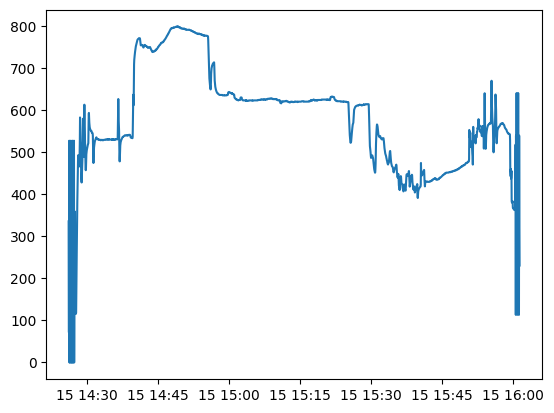

In [9]:
plt.plot(vol['t'], vol['EGT_SEL'])

Il est possible de superposer deux graphes en appelant plusieurs points plt.plot(). De plus, plot() peut recevoir une grande quantité d'options pour personnaliser l'aspect de la courbe :

- ligne ou points
- type de marqueur
- couleurs, taille/épaisseur de trait
- ...

Certaines options peuvent être combinées et exprimées sous forme de chaîne de caractère. Par exemple, 'b^--' signifie "marqueurs bleus en forme de triangles, reliés par un trait pointillé".

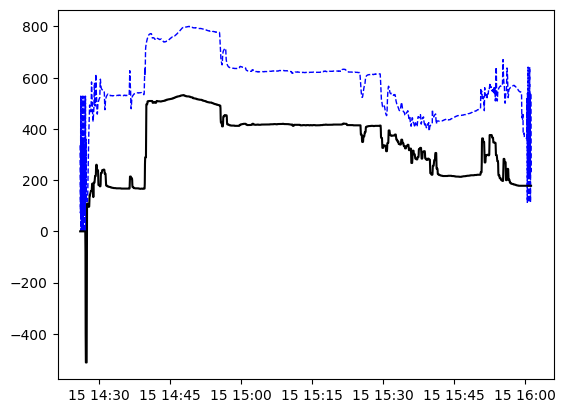

In [10]:
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')

Il est possible de visualiser plusieurs graphiques de manière juxtaposée. La méthode utilisée est plt.subplot().
Ses paramètres sont : le nombre de lignes, le nombre de colonnes, et le sous-plot sur lequel vous vous trouvez.

Ainsi, dans plt.subplot(1, 2, 1); 1, 2, 1 signifie "une figure à 1 ligne et 2 colonnes : allez au premier sous-plot". Ensuite, 1, 2, 2 signifie "une figure à 1 ligne et 2 colonnes : passez au deuxième sous-plot"

plt.figure(figsize=(x,y)) permet de définir la taille des plots, avec x : longueur et y: largeur.

plt.xlim(inf,sup) et plt.ylim(inf,sup) permettent de fixer la borne inférieur et supérieur respectivement de l'axe x et l'axe y.

(-600.0, 850.0)

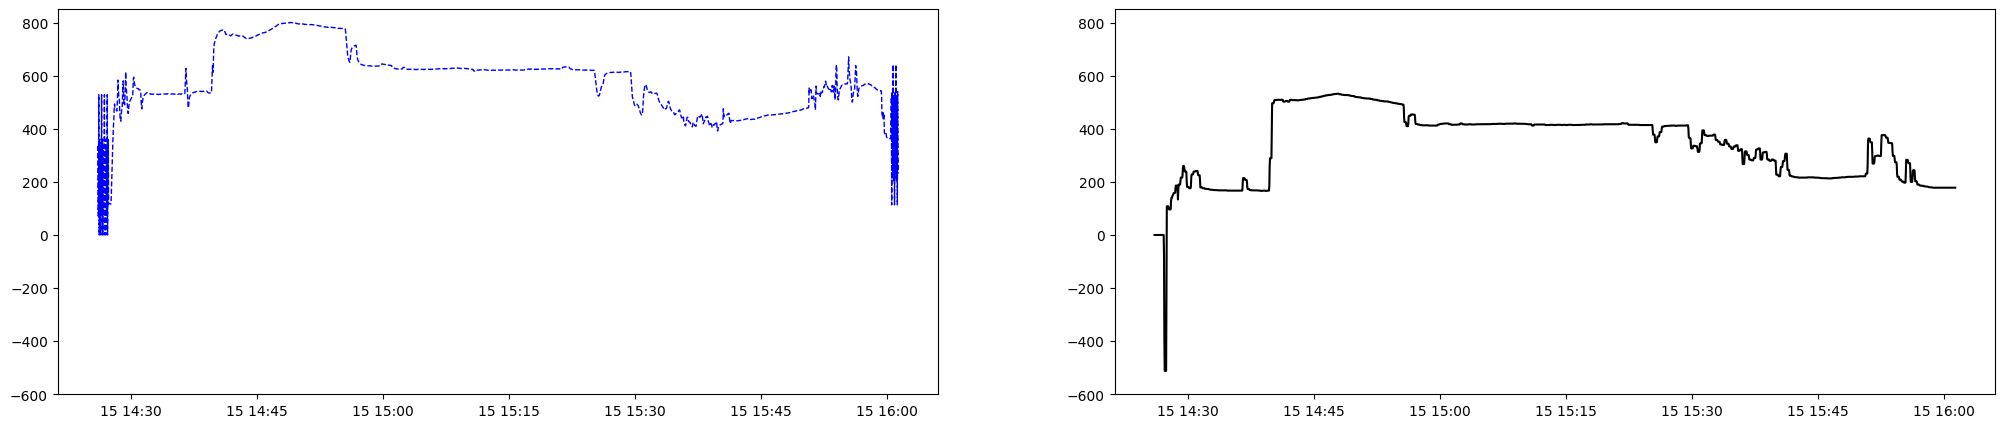

In [11]:
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.ylim(-600,850)

plt.subplot(1, 2, 2)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')
plt.ylim(-600,850)


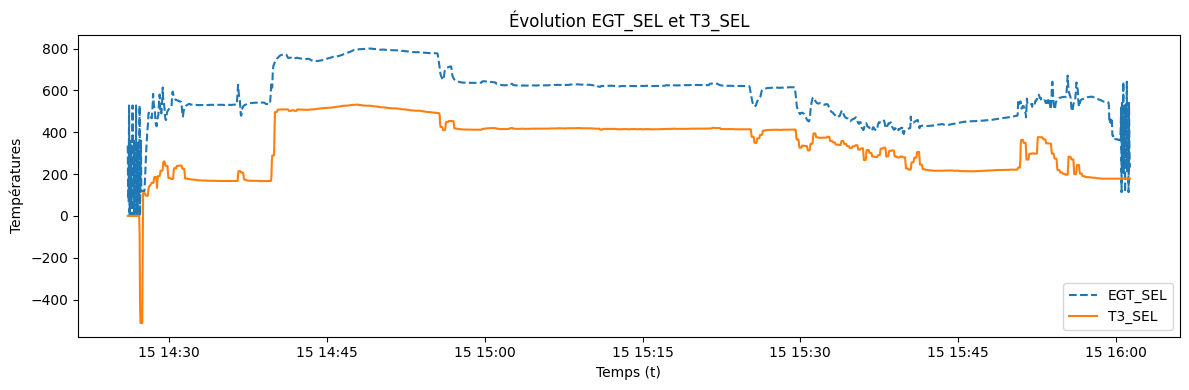

In [12]:
# Solution: plot avec titres et légende
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(vol['t'], vol['EGT_SEL'], linestyle='--')
plt.plot(vol['t'], vol['T3_SEL'])
plt.xlabel('Temps (t)')
plt.ylabel('Températures')
plt.title('Évolution EGT_SEL et T3_SEL')
plt.legend(['EGT_SEL','T3_SEL'])
plt.tight_layout()

### Corrélation

Utiliser la méthode corrcoef du module numpy pour calculer la corrélation entre deux variables X et Y.

In [13]:
my_rho = np.corrcoef(vol['T3_SEL'], vol['N1_SEL'])

print(my_rho)

[[1.         0.93912182]
 [0.93912182 1.        ]]


Nuage de point entre les deux variables T3 et N1 :

NameError: name 'corr_value' is not defined

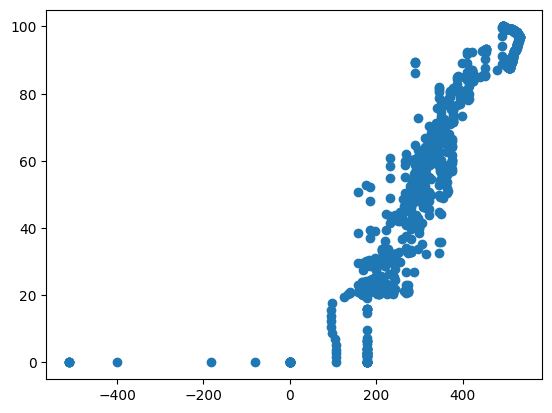

In [15]:
plt.scatter(vol['T3_SEL'],vol['N1_SEL'])
plt.title('Correlation = ' + "{:.2f}".format(my_rho[0,i+1]))
plt.show()

<Axes: >

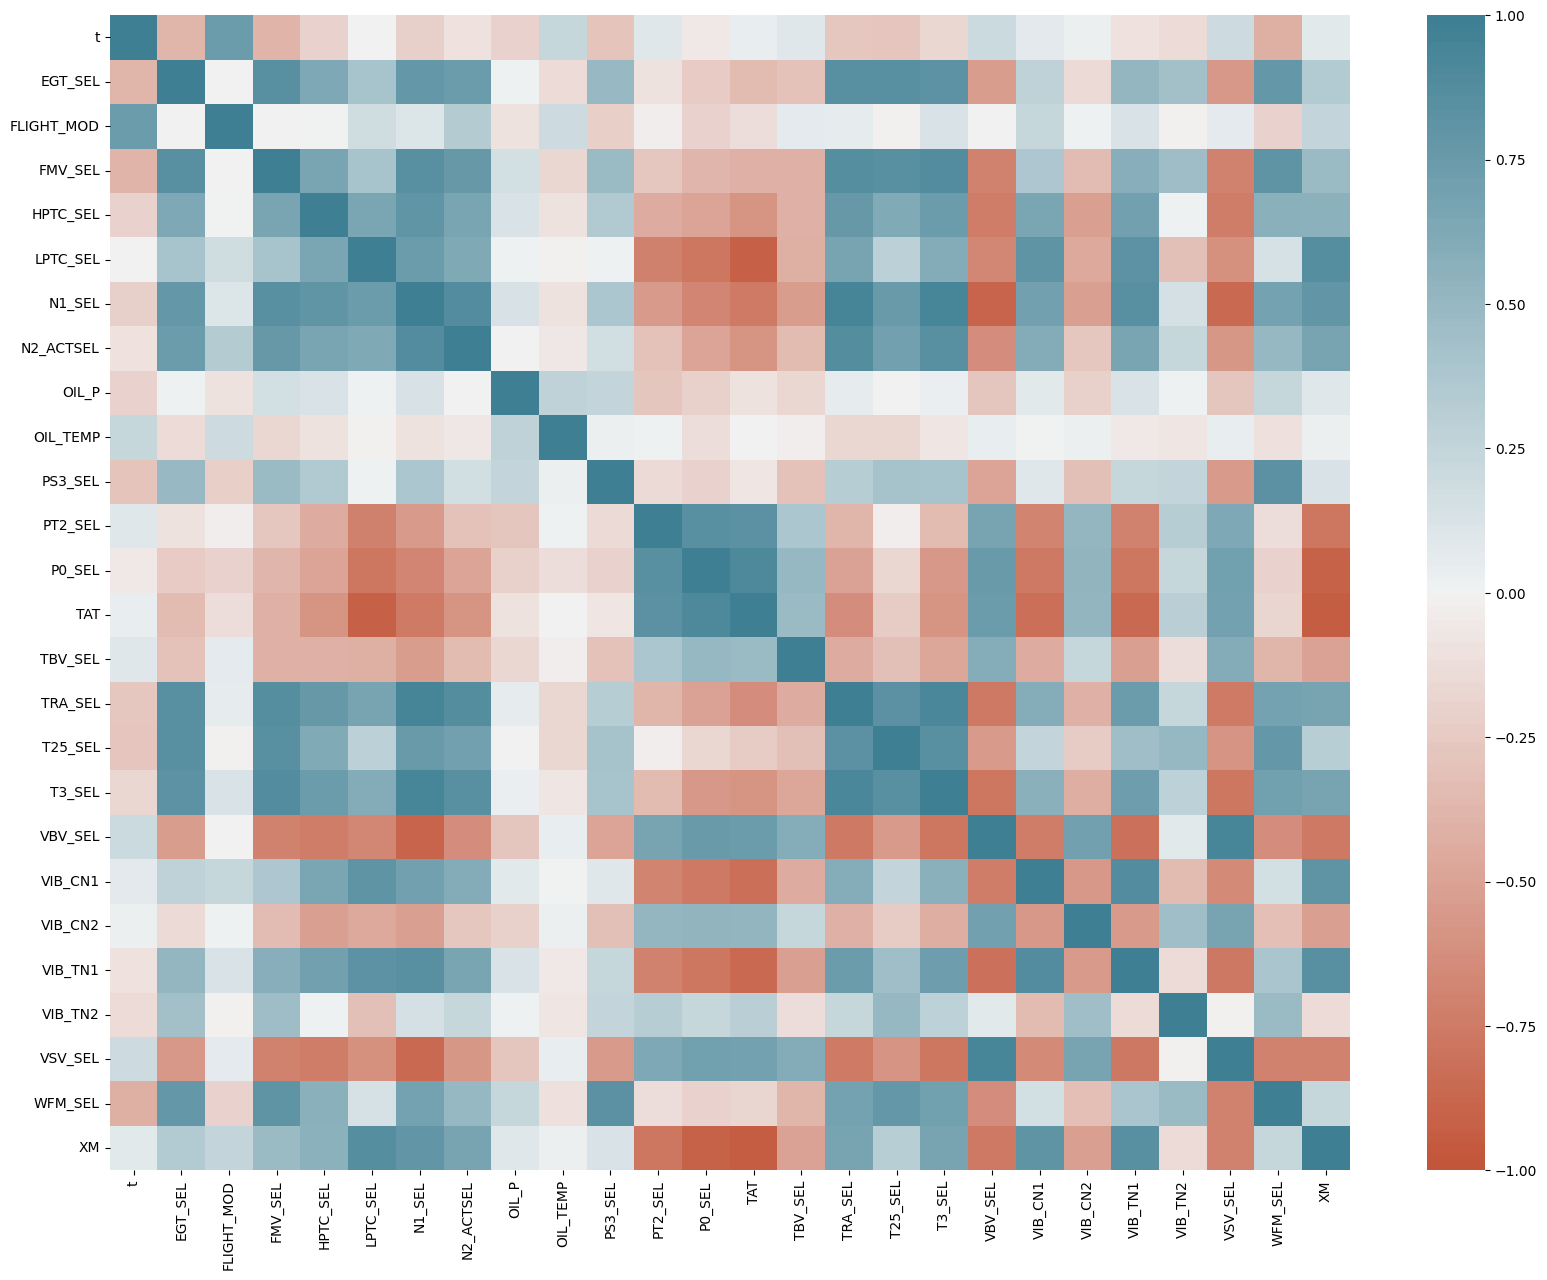

In [16]:
import seaborn as sns

# calculate the correlation matrix
corr = vol.corr()

# plot the heatmap
fig = plt.figure(figsize=(20,15))

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=False, fmt='.2f', vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200))

# Essayer avec annot=True

### Bar plot : temps passé dans chaque phase de vol avec `plt.bar`

Pour afficher un ensemble réduit de valeurs, le diagramme le plus adapté est le bar plot. Tout d'abord, il nous faut calculer le nombre de lignes du vol par phase de vol. La phase de vol est symbolisée par la variable `FLIGHT_MOD`. On suppose la correspondance suivante :

`FLIGHT_MOD` | Phase de vol
-------------|-------------
1 | taxi
2 | take_off
3 | begin_climb
4 | climb
5 | cruise_climb
6 | cruise
7 | descent
8 | approach
9 | flare
10 | landing

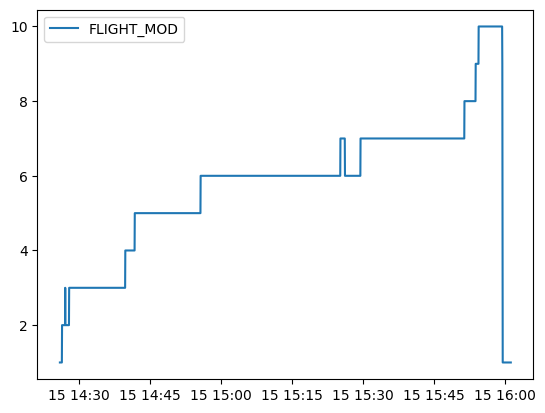

In [17]:
plt.plot(vol['t'], vol['FLIGHT_MOD'], label='FLIGHT_MOD')
plt.legend()

In [18]:
# Solution: correspondance FLIGHT_MOD -> phase de vol, et ajout de la colonne FLIGHT_PHASE
import pandas as pd

# Définir la correspondance en clair (à adapter selon vos codes si différents)
flight_phase_map = {
    1: "Ground",
    2: "Takeoff",
    3: "Climb",
    4: "Cruise",
    5: "Descent",
    6: "Approach",
    7: "Landing",
    8: "Taxi"
}

# Créer la nouvelle colonne (en gérant les codes absents de la map)
vol['FLIGHT_PHASE'] = vol['FLIGHT_MOD'].apply(lambda x: flight_phase_map.get(int(x) if pd.notnull(x) else x, "Unknown"))

# Aperçu
vol[['FLIGHT_MOD','FLIGHT_PHASE']].head()

,FLIGHT_MOD,FLIGHT_PHASE
0,1,Ground
1,1,Ground
2,1,Ground
3,1,Ground
4,1,Ground


,0
FLIGHT_PHASE,
Approach,788
Landing,550
Descent,335
Climb,281
Unknown,136
Taxi,57
Ground,53
Cruise,48
Takeoff,35


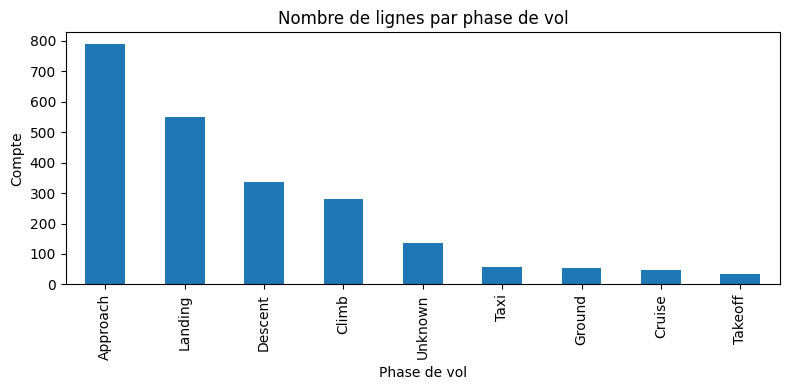

In [19]:
# Solution: nombre de lignes par phase de vol
import pandas as pd
phase_counts = vol.groupby('FLIGHT_PHASE').size().sort_values(ascending=False)
display(phase_counts)

# Bar plot simple
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
phase_counts.plot(kind='bar')
plt.title("Nombre de lignes par phase de vol")
plt.xlabel("Phase de vol")
plt.ylabel("Compte")
plt.tight_layout()

Voici enfin notre fameux bar plot :

<BarContainer object of 9 artists>

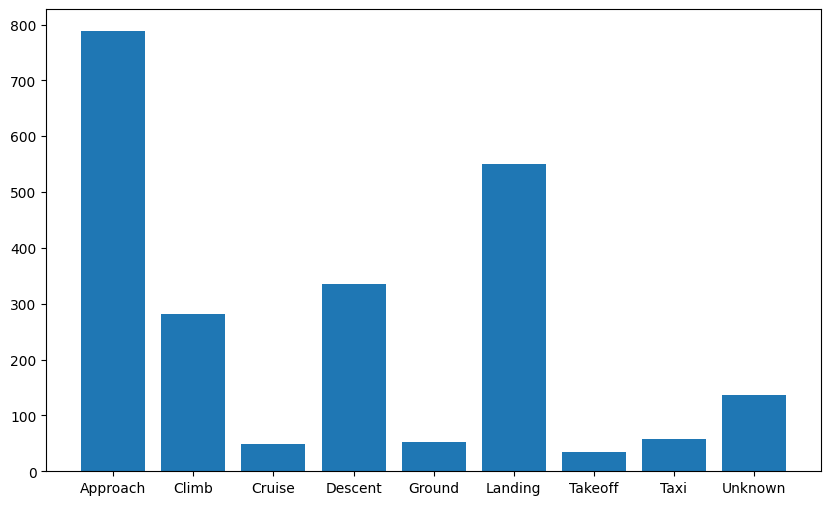

In [21]:
time_by_phase = vol.groupby('FLIGHT_PHASE').size()
plt.figure(figsize=(10,6)) # la méthode figure permet de créer une nouvelle figure et de configurer ses paramètres
plt.bar(np.arange(time_by_phase.size), time_by_phase, tick_label=time_by_phase.index.tolist())

,T25_SEL
FLIGHT_PHASE,
Descent,111.0000
Cruise,109.5000
Climb,75.5000
Taxi,73.5000
Approach,70.5000
Landing,58.0000
Unknown,56.7500
Takeoff,37.2500
Ground,35.1406


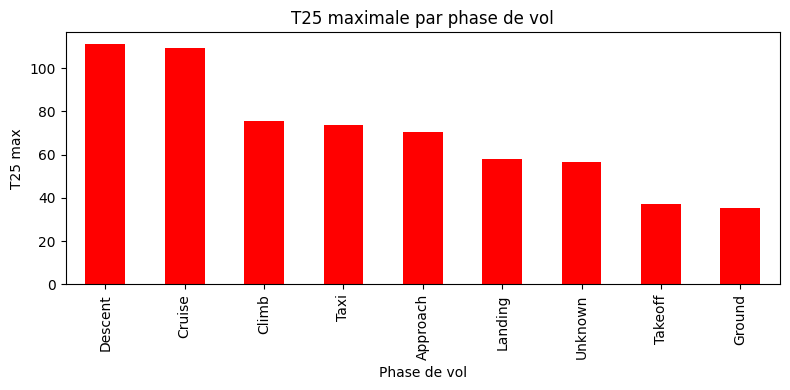

In [22]:
# Solution: T25 maximale par phase de vol (barres rouges)
import matplotlib.pyplot as plt
t25_max = vol.groupby('FLIGHT_PHASE')['T25_SEL'].max().sort_values(ascending=False)
display(t25_max)

plt.figure(figsize=(8,4))
t25_max.plot(kind='bar', color='red')
plt.title('T25 maximale par phase de vol')
plt.xlabel('Phase de vol')
plt.ylabel('T25 max')
plt.tight_layout()

### Pie plot : temps passé dans chaque phase de vol avec `plt.pie`

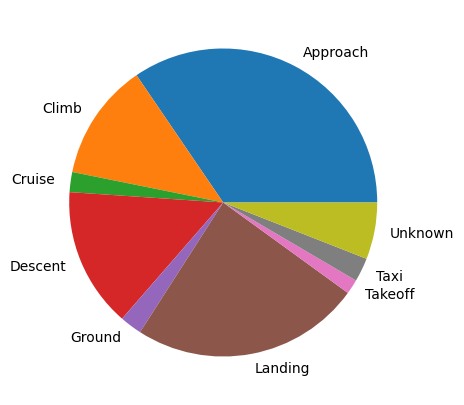

In [23]:
plt.figure(figsize=(5,5))
plt.pie(time_by_phase, labels=time_by_phase.index.tolist());

### Histogramme : représenter la distribution d'une variable

La meilleur façon de visualiser la distribution statistique d'une variable est l'histogramme. La méthode s'appelle `plt.hist()`. Étudiez sa documentation, car elle a de nombreux paramètres.

Voici un exemple avec la variable N1.

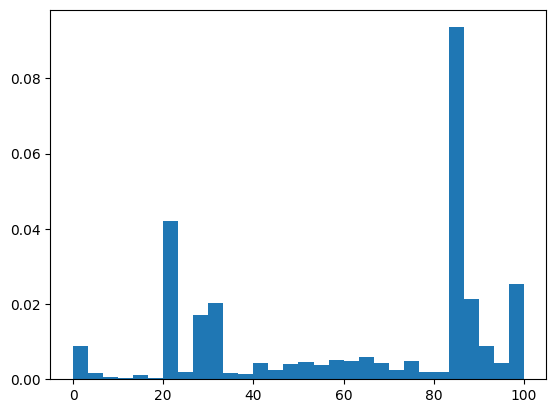

In [24]:
plt.hist(vol['N1_SEL'], bins=30, density=True); # Quel est l'effet de l'argument "density=..." ?

Beaucoup d'autres types de plots existents ! À vous de les découvrir...

## 2. Machine Learning non supervisé pour l'exploration de données avec scikit-learn

<img src="rc/scikit2.png" />

Dans cette section, on continue d'explorer le jeu de données à l'aide de techniques classique :

* PCA (Principal Component Analysis, https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales) : permet de trouver les composantes principales d'un jeu de données, correspondant aux directions orthogonales de plus grande variabilité des données. Ce directions correspondent aux vecteurs propres de la matrice de corrélation. En pratique, cette technique statistique permet de réduire la dimensionalité des données en les projectant sur les directions principales. En réduisant la dimensionalité à 2, on peut donc visualiser les données sur un plan.

<img width="300px" src="rc/PCA_fish.png" />

* $k$-means (https://fr.wikipedia.org/wiki/K-moyennes) est l'algorithme le plus répandu de _clustering_. Le clustering consiste à partitionner les données en différents groupes (appelés _clusters_), en maximisant la similarité _intra-cluster_ (entre les points d'un même cluster) et minimisant la similarité _inter-cluster_ (entre les points de clusters différents). Le clustering est aussi appelée classification _non supervisée_ (car on ne dispose pas d'étiquettes pour chaque classe).

<img width="300px" src="rc/cluster.png" />

Ces deux algorithmes incontournables permettent de décrire nos données et répondre aux questions suivantes :

* Quel est la distribution des données dans le plan des 2 première CP (composantes principales) ?
* Y a-t-il des groupes distincts dans nos données ?


#### 2.1. Préparation des données

Ces algorithmes requièrent des données numériques. Il faut donc éliminer du jeu de données les variables non numérique ou les transformer en variables numériques.

De plus, on essayera dans la suite de classifier les instants du vol par phase de vol en utilisant un algorithme de clustering. On élimine donc également la colonne "FLIGHT_MOD" du jeu de données.

In [25]:
# Solution: préparation des données numériques pour l'EDA/ML
import numpy as np
import pandas as pd

# 1) Colonnes non numériques
non_numeric_cols = vol.select_dtypes(exclude=[np.number]).columns.tolist()
print("Colonnes non numériques:", non_numeric_cols)

# 2) Supprimer colonnes non numériques + FLIGHT_MOD (cible/catégorielle)
cols_to_drop = list(set(non_numeric_cols + ['FLIGHT_MOD']))
X_vol_df = vol.drop(columns=[c for c in cols_to_drop if c in vol.columns])

# Convertir en array numpy
X_vol = X_vol_df.values

# 3) Dimensions
print("X_vol shape (n_samples, n_features):", X_vol.shape)
X_vol_df.head()

Colonnes non numériques: ['t', 'FLIGHT_PHASE']
X_vol shape (n_samples, n_features): (2283, 24)


,EGT_SEL,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,PS3_SEL,PT2_SEL,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
0,335.984000,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,9.599800e+02,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15
1,72.000600,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,0.000000e+00,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
2,72.001100,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,5.930390e-07,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
3,527.978000,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,1.344020e+03,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15
4,-0.001335,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,0.000000e+00,0.0,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15


Ensuite, il est nécessaire en analyse de données de normaliser nos données, car les différentes variables peuvent avoir des unités et plages de valeurs très différentes les unes des autres. Par exemple, certaines variables varient entre 0 et 1, d'autre, comme les températures, peuvent varier (en gros) de 0 à 1000. Pour pouvoir les rendre comparables, on utilisera la normalisation standard suivante, appelée _standardisation_ :

1. Retrait de la moyenne de chaque variable.
2. Division par l'écart-type.

Cela permet d'obtenir des variables de moyenne nulle et d'écart-type 1. Il existe bien entendu des normalisations bien plus poussées.

In [26]:
# Solution: standardisation (z-score) manuelle avec numpy
import numpy as np
import pandas as pd

# S'assurer que X_vol existe (sinon le reconstituer rapidement)
if 'X_vol' not in globals():
    non_numeric_cols = vol.select_dtypes(exclude=[np.number]).columns.tolist()
    cols_to_drop = list(set(non_numeric_cols + ['FLIGHT_MOD']))
    X_vol_df = vol.drop(columns=[c for c in cols_to_drop if c in vol.columns])
    X_vol = X_vol_df.values

# Calcul des moyennes et écarts-types selon l'axe 0 (par variable)
mu = X_vol.mean(axis=0)
sigma = X_vol.std(axis=0, ddof=0)

# Éviter la division par zéro si des variables constantes existent
sigma_safe = np.where(sigma == 0, 1.0, sigma)
X_vol_norm = (X_vol - mu) / sigma_safe

# 2) Vérifications (avec tolérance numérique)
mean_close = np.isclose(X_vol_norm.mean(axis=0), 0.0, atol=1e-8).all()
std_close = np.isclose(X_vol_norm.std(axis=0, ddof=0), 1.0, atol=1e-8).all()
print("Moyennes ≈ 0 ?", mean_close, " | Écarts-types ≈ 1 ?", std_close)

# Afficher quelques stats résiduelles
print("Moyennes (premières):", X_vol_norm.mean(axis=0)[:10])
print("Écarts-types (premiers):", X_vol_norm.std(axis=0, ddof=0)[:10])

Moyennes ≈ 0 ? True  | Écarts-types ≈ 1 ? True
Moyennes (premières): [ 6.22464070e-16 -9.95942512e-17  1.86739221e-16  0.00000000e+00
  7.46956884e-17  2.61434909e-16  2.48985628e-17 -2.61434909e-16
 -7.46956884e-17  2.24087065e-16]
Écarts-types (premiers): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


On ne ré-invente pas la roue : scikit-learn propose déjà un ensemble de méthodes de normalisation dans son module de prétraitement, `sklearn.preprocessing`.

In [27]:
from sklearn.preprocessing import StandardScaler
X_vol_norm = StandardScaler().fit_transform(X_vol)

In [28]:
# Solution: comparaison standardisation manuelle vs StandardScaler
import numpy as np
from sklearn.preprocessing import StandardScaler

# X_vol_norm manuel doit exister
X_manual = X_vol_norm

scaler = StandardScaler(with_mean=True, with_std=True)
X_sklearn = scaler.fit_transform(X_vol)

# Vérifier l'équivalence (tolérance numérique)
same = np.allclose(X_manual, X_sklearn, atol=1e-8)
print("Résultat identique (à tolérance près) ?", same)

# Afficher l'erreur max
print("Écart absolu max:", np.abs(X_manual - X_sklearn).max())

Résultat identique (à tolérance près) ? True
Écart absolu max: 0.0


#### 2.2. PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
vol_pca = PCA(n_components=2).fit(X_vol_norm)

#### 2.2.1. Étude de la variance expliquée

Le modèle PCA permet d'obtenir la part de variance des données expliquée par les différentes CP. En général, on garde autant de CP que nécessaire pour expliquer au total par exemple 90% ou 95% de la variance des données, afin de limiter la perte d'information. Ici, on en conserve 2 pour des raisons de visualisation.

In [31]:
# Solution: étude de la variance expliquée (complément)
import numpy as np
cum = np.cumsum(vol_pca.explained_variance_ratio_)
print("Variance expliquée cumulée (5 premières):", (cum[:5]*100))
print("Variance des 2 premières CP: {:.2f}%".format(100*(vol_pca.explained_variance_ratio_[:2].sum())))
print("Composantes pour 90%:", int(np.searchsorted(cum, 0.90)+1),
      "| pour 95%:", int(np.searchsorted(cum, 0.95)+1))

Variance expliquée cumulée (5 premières): [53.96958966 70.87377405]
Variance des 2 premières CP: 70.87%
Composantes pour 90%: 3 | pour 95%: 3


Variance expliquée cumulée (10 premières): [53.96958966 70.87377405 78.36138989 83.16185653 86.78931995 89.69993631
 91.96129131 93.74184027 94.9582057  96.06196733]
Variance des 2 premières CP: 70.87%
Composantes nécessaires pour 90%: 7  | pour 95%: 10


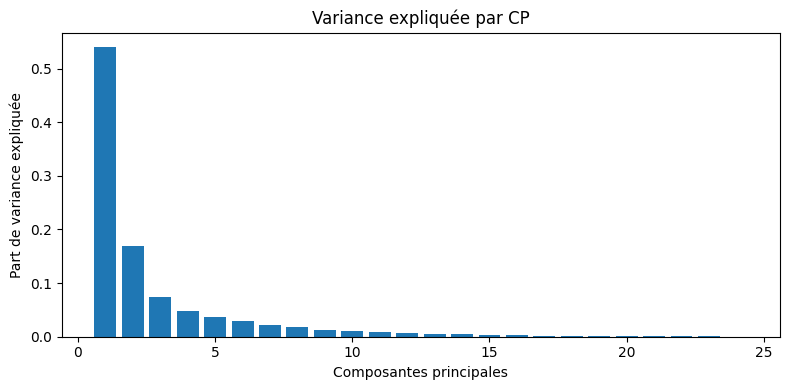

In [32]:
# Analyse PCA: variance expliquée et nombre de composantes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Utiliser X_vol_norm si disponible sinon normaliser à la volée
X_for_pca = X_vol_norm if 'X_vol_norm' in globals() else (X_vol - X_vol.mean(axis=0)) / (X_vol.std(axis=0, ddof=0) + 1e-12)

vol_pca = PCA().fit(X_for_pca)

# 1) Afficher le pourcentage de variance expliquée cumulée
cum = np.cumsum(vol_pca.explained_variance_ratio_)
print("Variance expliquée cumulée (10 premières):", (cum[:10]*100))

# 2) Pourcentage des 2 premières CP + seuils 90/95%
print("Variance des 2 premières CP: {:.2f}%".format(100*(vol_pca.explained_variance_ratio_[:2].sum())))
n90 = int(np.searchsorted(cum, 0.90) + 1)
n95 = int(np.searchsorted(cum, 0.95) + 1)
print("Composantes nécessaires pour 90%:", n90, " | pour 95%:", n95)

# 3) Bar plot de la variance expliquée (et échelle log optionnelle)
plt.figure(figsize=(8,4))
plt.bar(np.arange(1, len(vol_pca.explained_variance_ratio_)+1), vol_pca.explained_variance_ratio_)
plt.xlabel("Composantes principales")
plt.ylabel("Part de variance expliquée")
plt.title("Variance expliquée par CP")
plt.tight_layout()

# Variante: échelle log (dé-commentez si souhaitée)
# plt.yscale('log')

#### 2.2.2. Projection et visualisation

À présent, on projette les données sur les 2 premières CP pour les visualiser sur un scatter plot. La projection s'effectue :

* par produit matriciel avec les composantes principales, contenues dans l'array `vol_pca.components_`
* via la méthode `transform(...)` du modèle PCA

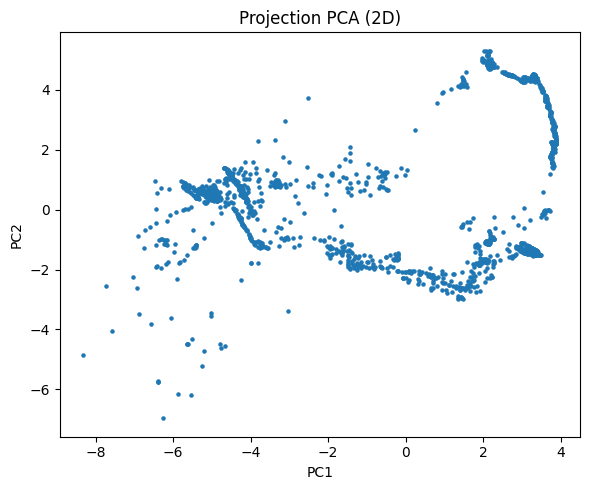

In [33]:
# Solution: projection PCA (2 premières composantes) et scatter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_for_pca = X_vol_norm if 'X_vol_norm' in globals() else (X_vol - X_vol.mean(axis=0)) / (X_vol.std(axis=0, ddof=0) + 1e-12)
pca2 = PCA(n_components=2).fit(X_for_pca)
X_proj2 = pca2.transform(X_for_pca)

plt.figure(figsize=(6,5))
plt.scatter(X_proj2[:,0], X_proj2[:,1], s=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA (2D)')
plt.tight_layout()

Ressource utile : les color maps matplotlib https://matplotlib.org/users/colormaps.html

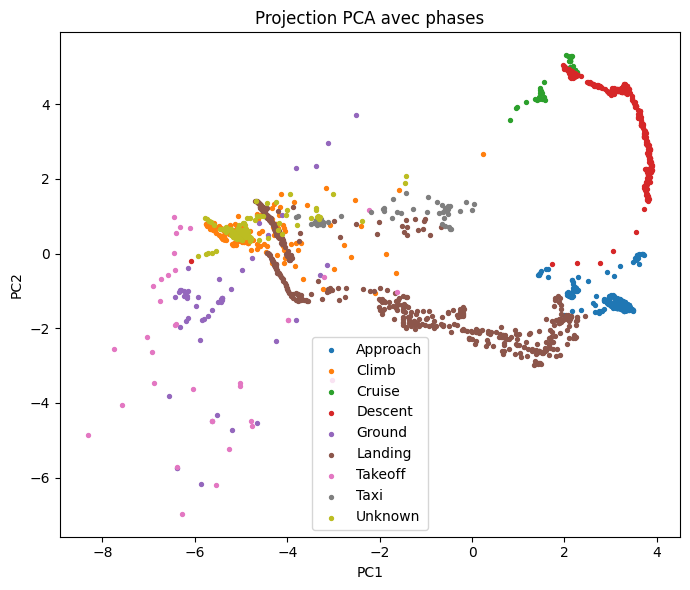

In [34]:
# Solution: projection PCA colorée par phase de vol
import matplotlib.pyplot as plt

# Reutiliser X_proj2 si dispo
if 'X_proj2' not in globals():
    from sklearn.decomposition import PCA
    X_for_pca = X_vol_norm if 'X_vol_norm' in globals() else (X_vol - X_vol.mean(axis=0)) / (X_vol.std(axis=0, ddof=0) + 1e-12)
    X_proj2 = PCA(n_components=2).fit_transform(X_for_pca)

phases = vol['FLIGHT_PHASE'].astype(str).values
uniq = np.unique(phases)

plt.figure(figsize=(7,6))
for ph in uniq:
    mask = phases == ph
    plt.scatter(X_proj2[mask,0], X_proj2[mask,1], s=8, label=ph)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA avec phases')
plt.tight_layout()

#### 2.3. $k$-means

L'algorithme $k$-means est disponible dans le module `sklearn.clustering`, au côté d'autres algorithmes de clustering.

In [ ]:
from sklearn.cluster import KMeans

#### 2.3.1. Apprentissage et visualisation des résultats

In [35]:
# Solution: k-means clustering (K = nb de phases connues unique)
import numpy as np
from sklearn.cluster import KMeans

# Définir K (si on suppose autant de clusters que de classes)
K = len(np.unique(vol['FLIGHT_PHASE']))
km = KMeans(n_clusters=K, random_state=0, n_init=10)
labels = km.fit_predict(X_for_pca)

# Répartition des clusters
counts = np.bincount(labels)
print("Effectifs par cluster:", counts)

Effectifs par cluster: [534 854 263 378   5 172  54  15   8]


#### 2.3.2. Calcul de la pureté du clustering

On souhaite maintenant répondre plus en détail à la question :
    
> Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?

On commence par évaluer la capacité de notre modèle à trouver des clusters **homogènes par rapport à une variable cible**. Ici, notre variable cible sera la phase de vol. On cherche donc à mesurer si les clusters contiennent des points appartenant à une même phase de vol. Pour cela, on utilise un **indice de qualité de clustering** appelé **pureté** (_purity_).

La pureté se calcule de la manière suivante :

1. On associe à tous les points d'un cluster la classe (i.e. la variable cible) la plus fréquente au sein de ce cluster.
2. On divise le nombre de points correctement associés à leur cluster par le nombre total de points.

Pour un partitionnement $\mathbf{Q} = \{Q_k\}, k = 1 \ldots K$ et en notant $\mathbf{Y} = \{Y_j\}, j = 1 \ldots C$ l'ensemble des points appartenant à chaque classe, on a :
\begin{equation}
    purity(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \sum_{k=1}^K \underset{j = 1 \ldots C}{\max} |Q_k \cap Y_j|
\end{equation}

In [36]:
# Solution: pureté de clustering (non-bijective, simple majority)
import numpy as np

def cluster_purity(labels, targets):
    labels = np.asarray(labels)
    targets = np.asarray(targets)
    K = labels.max() + 1
    total = len(labels)
    s = 0
    for k in range(K):
        mask = labels == k
        if mask.any():
            # classe majoritaire dans ce cluster
            vals, cnts = np.unique(targets[mask], return_counts=True)
            s += cnts.max()
    return s / total

pur = cluster_purity(labels, vol['FLIGHT_PHASE'].astype(str).values)
print('Pureté : {:f} %'.format(pur*100))

Pureté : 80.683311 %


K optimal (selon pureté simple): 9  | Pureté: 0.8068331143232589


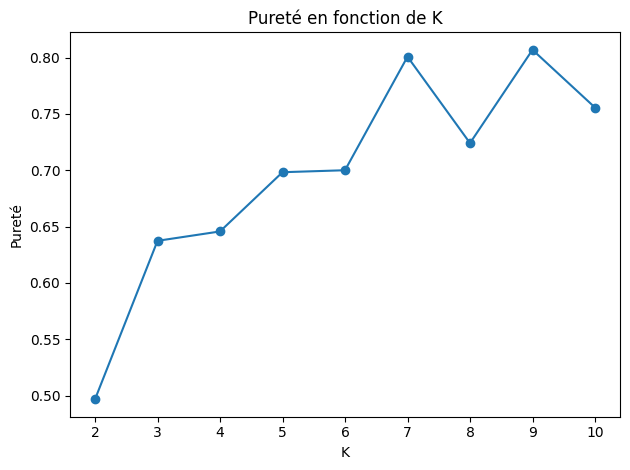

In [37]:
# Solution: effet du nombre de clusters K sur la pureté
import numpy as np
from sklearn.cluster import KMeans

Ks = list(range(2, 11))
purs = []
for K in Ks:
    km = KMeans(n_clusters=K, random_state=0, n_init=10)
    labs = km.fit_predict(X_for_pca)
    purs.append(cluster_purity(labs, vol['FLIGHT_PHASE'].astype(str).values))

# Affichage
import matplotlib.pyplot as plt
plt.figure()
plt.plot(Ks, purs, marker='o')
plt.xlabel("K")
plt.ylabel("Pureté")
plt.title("Pureté en fonction de K")
plt.tight_layout()

# Commentaire (imprimé)
bestK = Ks[int(np.argmax(purs))]
print("K optimal (selon pureté simple):", bestK, " | Pureté:", purs[np.argmax(purs)])

#### 2.3.3. Calcul de la précision de classification non supervisée (_unsupervised clustering accuracy_)

Enfin, on souhaite évaluer la performance de notre modèle en tant que classificateur.

**Note** : cette approche n'a de sens que si le nombre de clusters est égal au nombre de classes de la variable cible !

Pour ce faire, nous allons passer par une métrique appelée **unsupervised clustering accuracy**. Celle-ci correspond à la précision de classification (i.e. proportion de points correctement classifiés), mais dans un cadre non supervisé. Cette métrique mesure la capacité à partitionner les données selon les différentes modalités d'une variable cible. La question est donc de mesurer la capacité du modèle $k$-means à partitionner les données selon la phase de vol.

Cette métrique s'écrit :
\begin{equation}
    acc(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \underset{m}\max \sum_{k=1}^K |Q_k \cap Y_{m(k)}|
\end{equation}

où on cherche la meilleure association $m$ (_mapping_) deux à deux entre clusters et classes (dans notre cas, l'association entre Cluster 0, Cluster 1, etc. et les phases de vol taxi, take_off, etc.).

Pour calculer cette meilleur association, un algorithme efficace est la _méthode Hongroise_ ou algorithme de Kuhn-Munkres. Celui-ci est disponible dans le module de scipy `scipy.optimize.linear_sum_assignment`.

In [38]:
from scipy.optimize import linear_sum_assignment

In [39]:
def cluster_acc(labels, targets):
    assert labels.size == targets.size
    D = max(labels.max(), targets.max()) + 1
    w = np.zeros((D, D))
    for i in range(labels.size):
        w[labels[i], targets[i]] += 1
    row_ind, col_ind = linear_sum_assignment(w.max() - w)
    return w[row_ind, col_ind].sum() * 1.0 / labels.size

acc = cluster_acc(labels, vol['FLIGHT_MOD'])
print('Accuracy : {:f} %'.format(acc*100))

Accuracy : 72.579939 %


#### Test Khi-2

Découvrir la library scipy pour effectuer le test de chi-deux d'indépendance des variables dans un tableau de contingence.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

scipy.stats.chi2_contingency : fonction permet de calculer le score de khi-2 et la p-value pour le test d'hypothèse d'indépendance des fréquences observées.